In [75]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from inspect import signature
from pprint import pprint as pp

In [76]:
import warnings
warnings.filterwarnings(action = 'ignore')

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [146]:
df_search1 = pd.read_csv('../Project_data/data/Search1.csv')
df_segs = pd.read_csv('../Project_data/data/segs.csv')
df_customer = pd.read_csv('../Project_data/data/Custom.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CLNT_ID     int64 
 1   SESS_ID     int64 
 2   KWD_NM      object
 3   SEARCH_CNT  int64 
dtypes: int64(3), object(1)
memory usage: 88.0+ MB
None
'=================================================='
(2884943, 4)
'=================================================='


In [147]:
#Search1 DATAFRAME head 확인
df_search1.head()

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1


In [81]:
df_segs.head()

,CLNT_ID,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4540824,2062130,79,2
1,5091280,18639400,378,2
2,225269,4100,3,3
3,241426,37300,3,3
4,1063284,186600,7,2


In [137]:
df_segs = pd.merge(left = df_customer, right = df_segs, 
                   how = 'inner', on = 'CLNT_ID')
df_segs

,CLNT_ID,CLNT_GENDER_x,CLNT_AGE_x,CLNT_GENDER_y,CLNT_AGE_y,PD_BUY_TOT,BUY_COUNT,CUS_SEG
0,4830726,F,30,F,30,260000,2,1
1,4830874,F,40,F,40,276000,4,2
2,4830975,F,30,F,30,104300,2,3
3,4831275,F,30,F,30,71400,2,3
4,4825325,F,30,F,30,529700,11,2
...,...,...,...,...,...,...,...,...
671656,3725302,F,40,F,40,29000,1,3
671657,3725462,M,40,M,40,35700,2,3
671658,3725818,F,30,F,30,143400,2,3
671659,3661812,F,30,F,30,15600,4,4


In [100]:
df_search_seg = pd.merge(left = df_segs, right = df_search_groupby, 
                         how = 'inner', on='CLNT_ID')

In [102]:
df_search_seg

,CLNT_ID,CLNT_GENDER,CLNT_AGE,PD_BUY_TOT,BUY_COUNT,CUS_SEG,SEARCH_CNT
0,4830726,F,30,260000,2,1,4
1,4825325,F,30,529700,11,2,26
2,4825382,F,40,101900,2,3,1
3,4825797,F,40,111500,3,3,4
4,4825908,F,30,706100,18,2,5
...,...,...,...,...,...,...,...
375853,3720346,F,30,113000,2,3,2
375854,3720442,F,20,101700,7,4,2
375855,3723092,F,30,471300,6,2,20
375856,3723318,F,40,70400,4,4,1


In [103]:
#고객중 가장 높은 검색 횟수: 98

df_search1.SEARCH_CNT.max()

98

In [104]:
#고객들의 평균 검색 횟수: 1회

df_search1.SEARCH_CNT.mean()

1.9085479331827353

In [105]:
#검색한 고객 수: 511477

df_search1.CLNT_ID.nunique()

511477

In [106]:
#재방문 고객: 1,160,589개

df_search1.SESS_ID.nunique()

1160589

## 고객 등급 별 '검색량' 시각화

In [109]:
#DATAFRAME 불린 추출로 그룹 나누기

dataset1 = df_search_seg[df_search_seg['CUS_SEG'] == 1] 
dataset2 = df_search_seg[df_search_seg['CUS_SEG'] == 2] 
dataset3 = df_search_seg[df_search_seg['CUS_SEG'] == 3] 
dataset4 = df_search_seg[df_search_seg['CUS_SEG'] == 4] 

In [110]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48364 entries, 0 to 375849
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CLNT_ID      48364 non-null  int64 
 1   CLNT_GENDER  48364 non-null  object
 2   CLNT_AGE     48364 non-null  int64 
 3   PD_BUY_TOT   48364 non-null  int64 
 4   BUY_COUNT    48364 non-null  int64 
 5   CUS_SEG      48364 non-null  int64 
 6   SEARCH_CNT   48364 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 3.0+ MB


In [111]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165772 entries, 1 to 375857
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      165772 non-null  int64 
 1   CLNT_GENDER  165772 non-null  object
 2   CLNT_AGE     165772 non-null  int64 
 3   PD_BUY_TOT   165772 non-null  int64 
 4   BUY_COUNT    165772 non-null  int64 
 5   CUS_SEG      165772 non-null  int64 
 6   SEARCH_CNT   165772 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 10.1+ MB


In [112]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117643 entries, 2 to 375853
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CLNT_ID      117643 non-null  int64 
 1   CLNT_GENDER  117643 non-null  object
 2   CLNT_AGE     117643 non-null  int64 
 3   PD_BUY_TOT   117643 non-null  int64 
 4   BUY_COUNT    117643 non-null  int64 
 5   CUS_SEG      117643 non-null  int64 
 6   SEARCH_CNT   117643 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 7.2+ MB


In [113]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44079 entries, 10 to 375856
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CLNT_ID      44079 non-null  int64 
 1   CLNT_GENDER  44079 non-null  object
 2   CLNT_AGE     44079 non-null  int64 
 3   PD_BUY_TOT   44079 non-null  int64 
 4   BUY_COUNT    44079 non-null  int64 
 5   CUS_SEG      44079 non-null  int64 
 6   SEARCH_CNT   44079 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.7+ MB


## 고객 그룹 분포 시각화 (Customer + Seg)

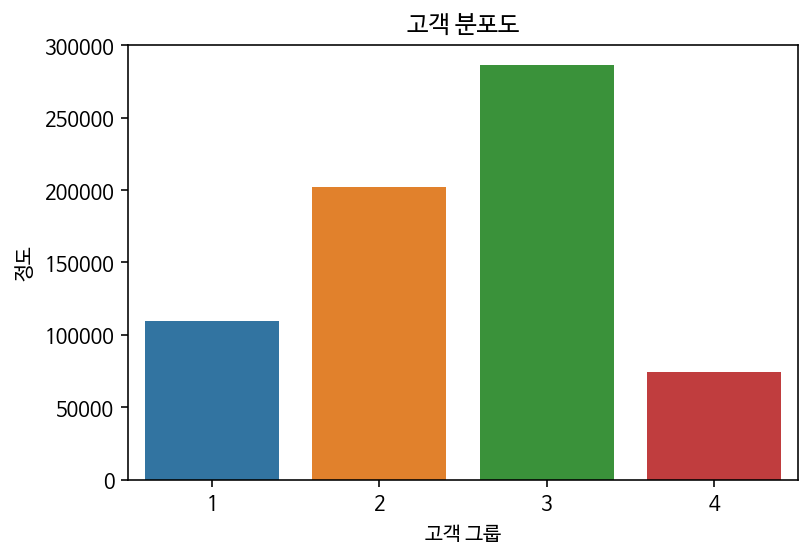

In [138]:
frame, grid = plt.subplots()
grid = sns.countplot('CUS_SEG', data=df_segs)
grid.set_title("고객 분포도")
grid.set_xlabel("고객 그룹")
grid.set_ylabel("정도")

plt.show()

## 고객 그룹별 검색량

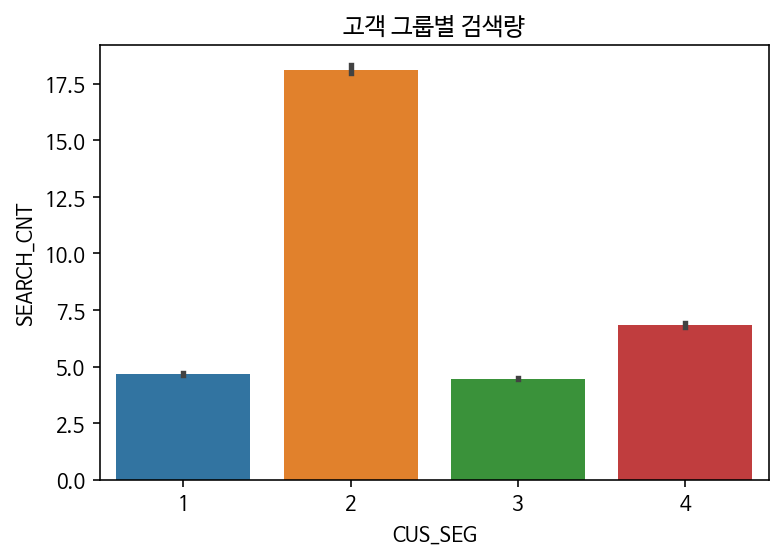

In [115]:
frame, grid = plt.subplots()
grid = sns.barplot(x = 'CUS_SEG', y = 'SEARCH_CNT', data=df_search_seg)
grid.set_title('고객 그룹별 검색량')
plt.show()

## 고객의 연령, 성별에 따른 검색량 차이보기

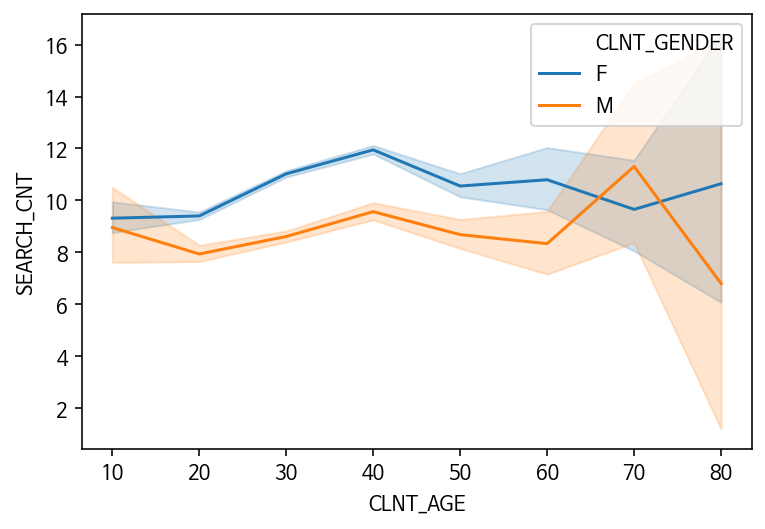

In [140]:
grid = sns.lineplot(x="CLNT_AGE", y="SEARCH_CNT", 
                    hue="CLNT_GENDER", data=df_search_seg)

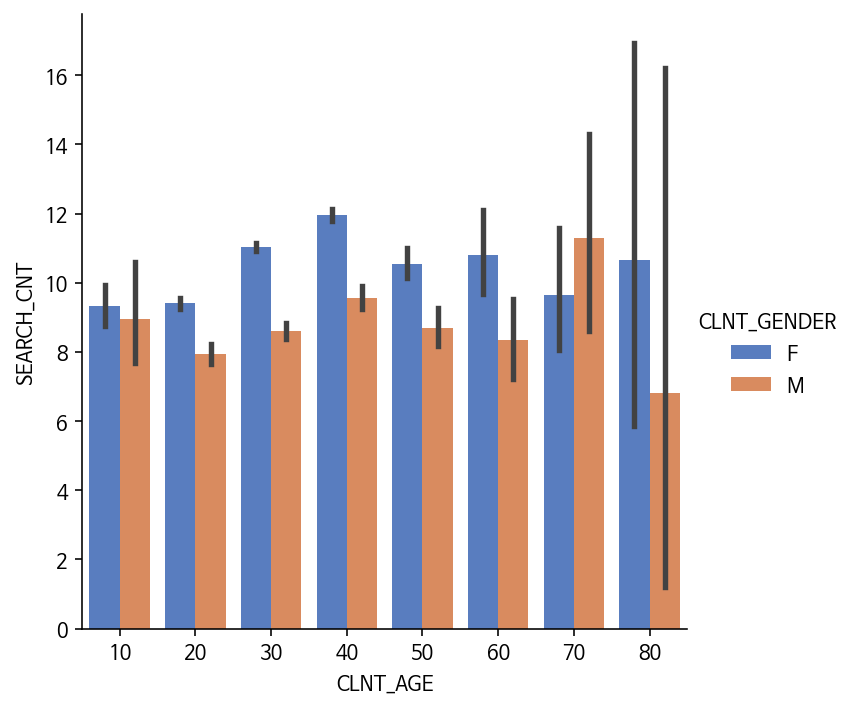

In [135]:
gird = sns.catplot(x="CLNT_AGE", y="SEARCH_CNT", 
                   hue="CLNT_GENDER", data=df_search_seg, 
                   kind="bar", palette="muted")